## Time Series Analysis

In [1]:
%matplotlib widget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
print("import successful")

import successful


In [2]:
#data loading 
df = pd.read_csv("./data_set/test.csv")
print("data loaded")



data loaded


In [3]:
#data exploration

print(df.head())
print("")
print(df.info())


         Date  store_id  product_id  number_sold
0  2019-01-01         0           0          845
1  2019-01-02         0           0          851
2  2019-01-03         0           0          840
3  2019-01-04         0           0          842
4  2019-01-05         0           0          845

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25550 entries, 0 to 25549
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         25550 non-null  object
 1   store_id     25550 non-null  int64 
 2   product_id   25550 non-null  int64 
 3   number_sold  25550 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 798.6+ KB
None


In [4]:
df.describe()

,store_id,product_id,number_sold
count,25550.000000,25550.000000,25550.000000
mean,3.000000,4.500000,790.050802
std,2.000039,2.872338,211.923573
min,0.000000,0.000000,234.000000
25%,1.000000,2.000000,722.000000
50%,3.000000,4.500000,852.000000
75%,5.000000,7.000000,933.000000
max,6.000000,9.000000,1110.000000


In [5]:
df.info()
#finding null values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25550 entries, 0 to 25549
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         25550 non-null  object
 1   store_id     25550 non-null  int64 
 2   product_id   25550 non-null  int64 
 3   number_sold  25550 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 798.6+ KB
Date           0
store_id       0
product_id     0
number_sold    0
dtype: int64


In [6]:
df['Date']

0        2019-01-01
1        2019-01-02
2        2019-01-03
3        2019-01-04
4        2019-01-05
            ...    
25545    2019-12-27
25546    2019-12-28
25547    2019-12-29
25548    2019-12-30
25549    2019-12-31
Name: Date, Length: 25550, dtype: object

In [7]:
selected_date = pd.to_datetime("2019-01-03")
print(df.loc[df["Date"] == selected_date])


Empty DataFrame
Columns: [Date, store_id, product_id, number_sold]
Index: []


In [8]:
# number of products 
print(df["product_id"].unique())

[0 1 2 3 4 5 6 7 8 9]


In [9]:
# number of stores
print(df["store_id"].unique())

[0 1 2 3 4 5 6]


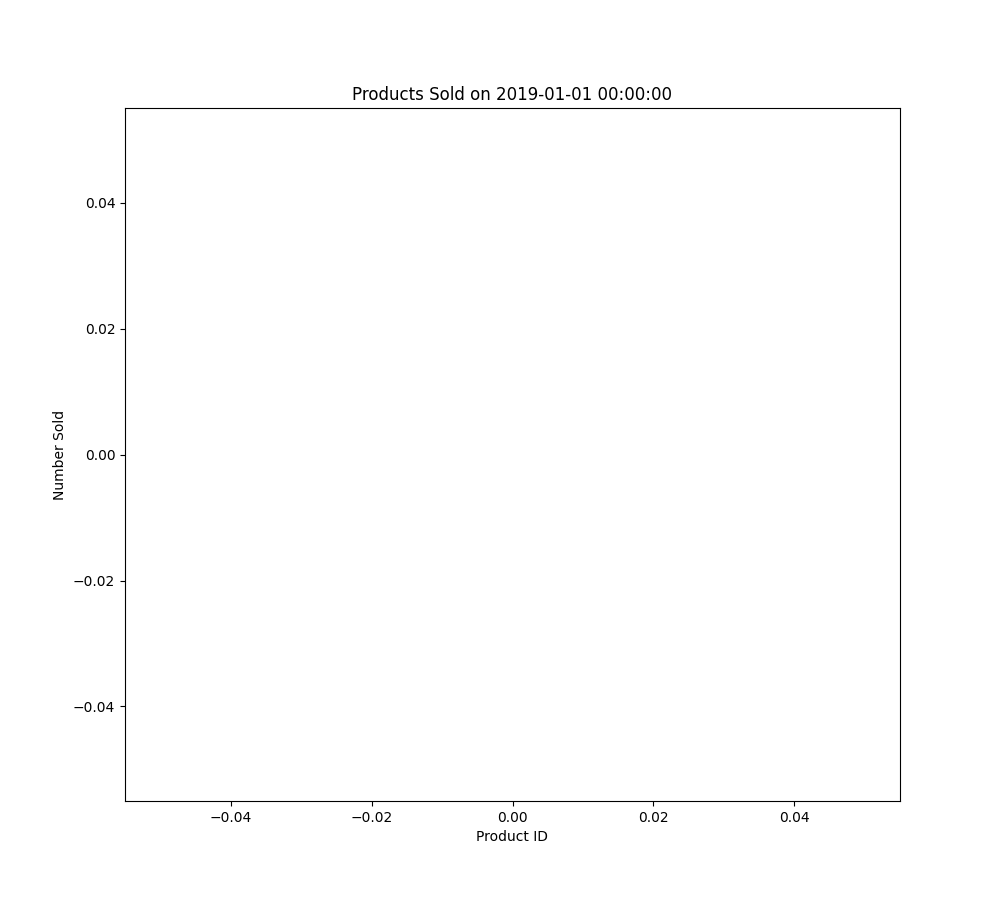

In [10]:
selected_date = pd.to_datetime("2019-01-01")

# Filter data for the selected date
selected_date_data = df[df["Date"] == selected_date]

# Plot a bar chart
plt.figure(figsize=(10, 9))
plt.bar(selected_date_data["product_id"], selected_date_data["number_sold"])
plt.xlabel("Product ID")
plt.ylabel("Number Sold")
plt.title(f"Products Sold on {selected_date}")
plt.show()

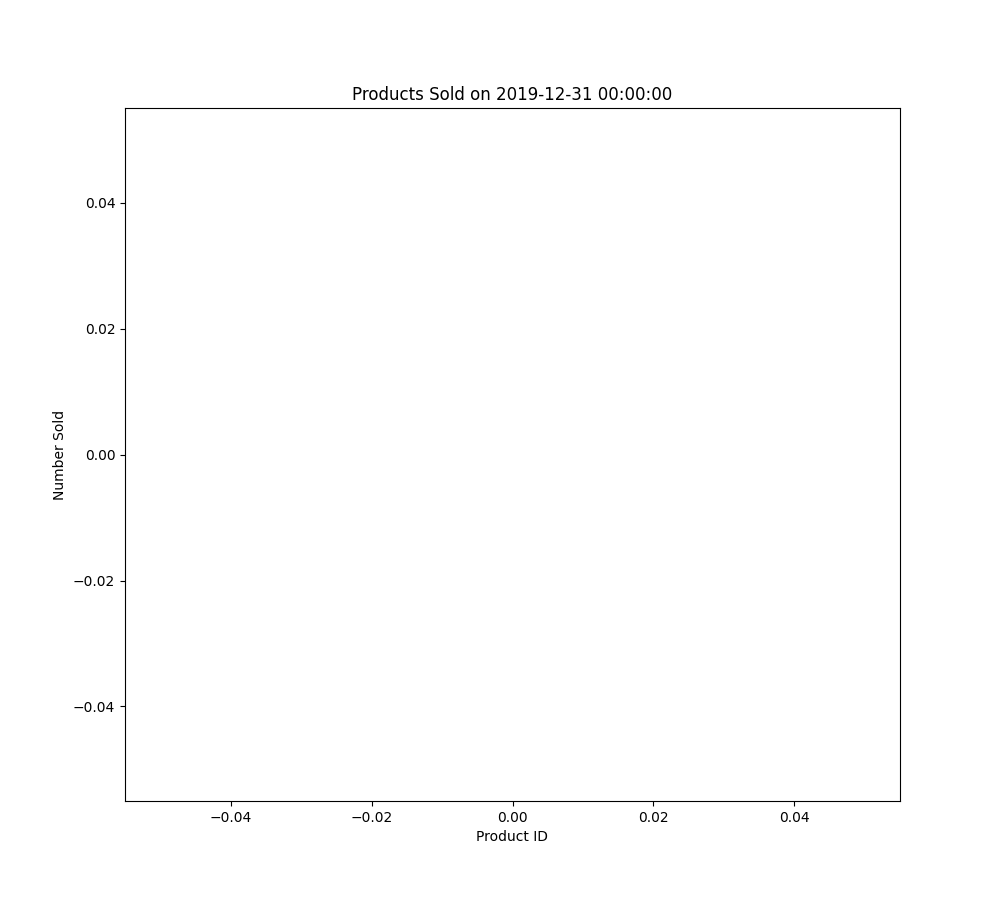

In [11]:

selected_date = pd.to_datetime("2019-12-31")

# Filter data for the selected date
selected_date_data = df[df["Date"] == selected_date]

# Plot a bar chart
plt.figure(figsize=(10, 9))
plt.bar(selected_date_data["product_id"], selected_date_data["number_sold"])
plt.xlabel("Product ID")
plt.ylabel("Number Sold")
plt.title(f"Products Sold on {selected_date}")
plt.show()

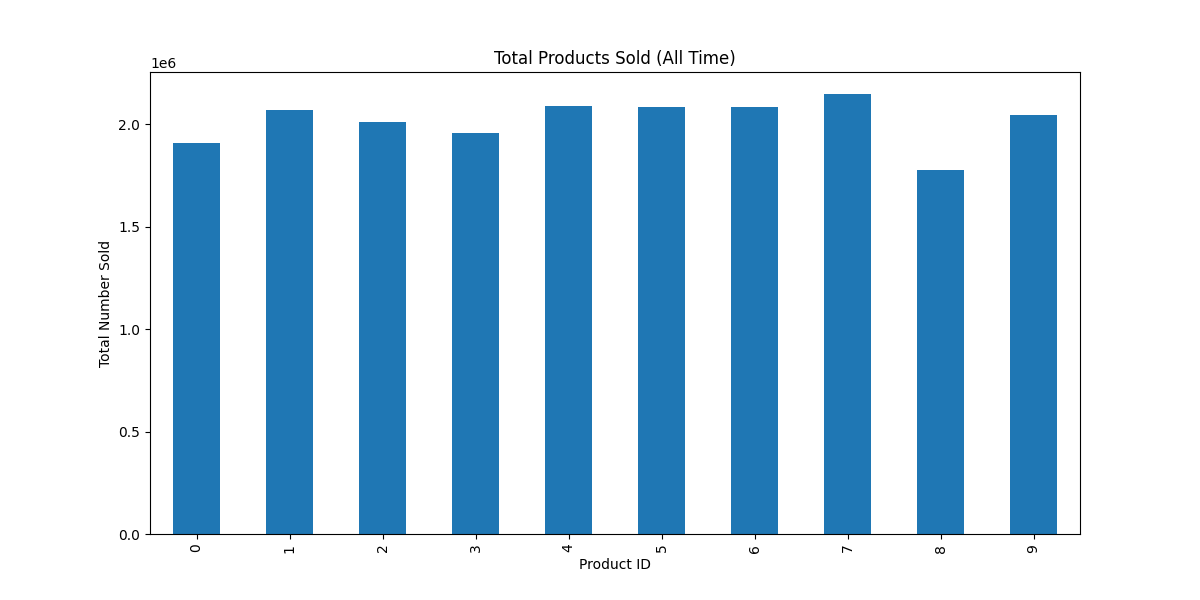

In [12]:
# Plot a bar chart
df["Date"] = pd.to_datetime(df["Date"])

# Group by product_id and calculate the total number of units sold
total_sold_per_product = df.groupby("product_id")["number_sold"].sum()

# Plot a bar chart
plt.figure(figsize=(12, 6))     
total_sold_per_product.plot(kind="bar")
plt.xlabel("Product ID")
plt.ylabel("Total Number Sold")
plt.title("Total Products Sold (All Time)")
plt.show()

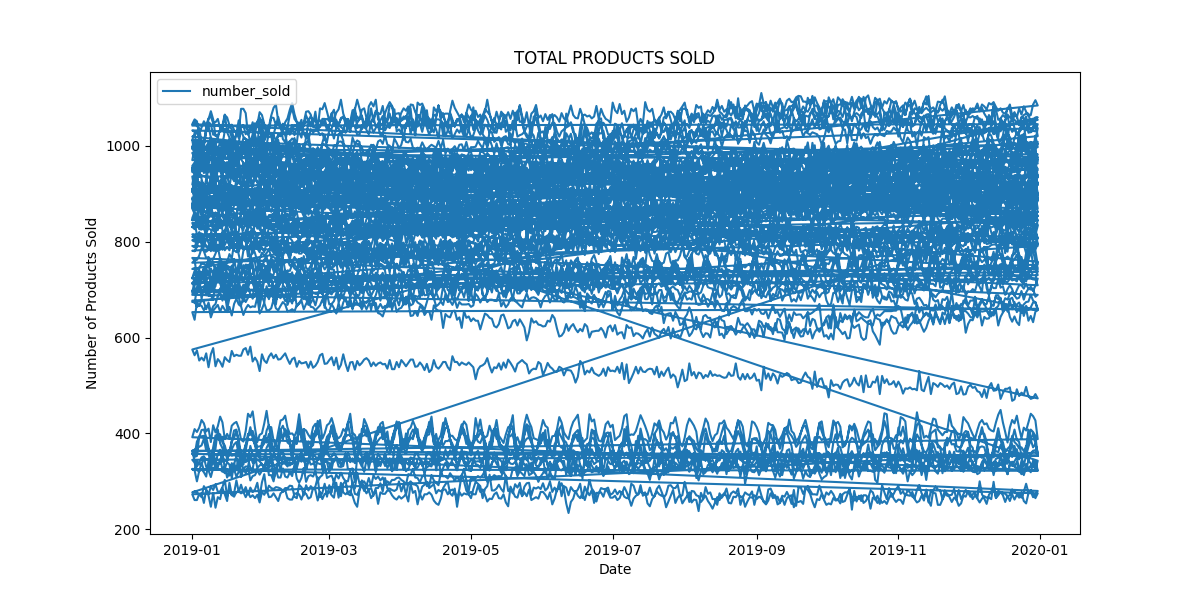

In [13]:
# visualize the data
df.set_index("Date", inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(df["number_sold"], label="number_sold")
plt.title("TOTAL PRODUCTS SOLD")
plt.xlabel("Date")
plt.ylabel("Number of Products Sold")
plt.legend()
plt.show()

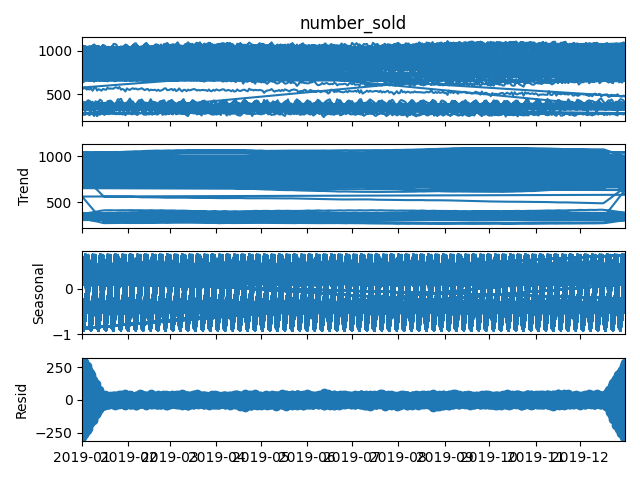

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(
    df["number_sold"], model="additive", period=30
)  # Change period based on your data
result.plot()
plt.show()

The image above appears to be a graph showing the number of products sold over a 12-month period. The x-axis shows the months of the year, and the y-axis shows the number of gold bars sold. There are also two lines on the graph, one labeled "Resid" and the other labeled "Trend."

The data suggests that the number of gold bars sold is seasonal, with the highest sales in the spring and summer months and the lowest sales in the fall and winter months. There is also a trend of increasing sales over time.

Here are some specific details I can see in the image:

The highest number of gold bars sold was in May 2019, at around 1000 bars.
The lowest number of gold bars sold was in December 2019, at around -250 bars.
The average number of gold bars sold per month is around 250 bars.

### Step 7: Check for Anomalies
You can use statistical methods, such as moving averages or rolling standard deviations, to identify anomalies.

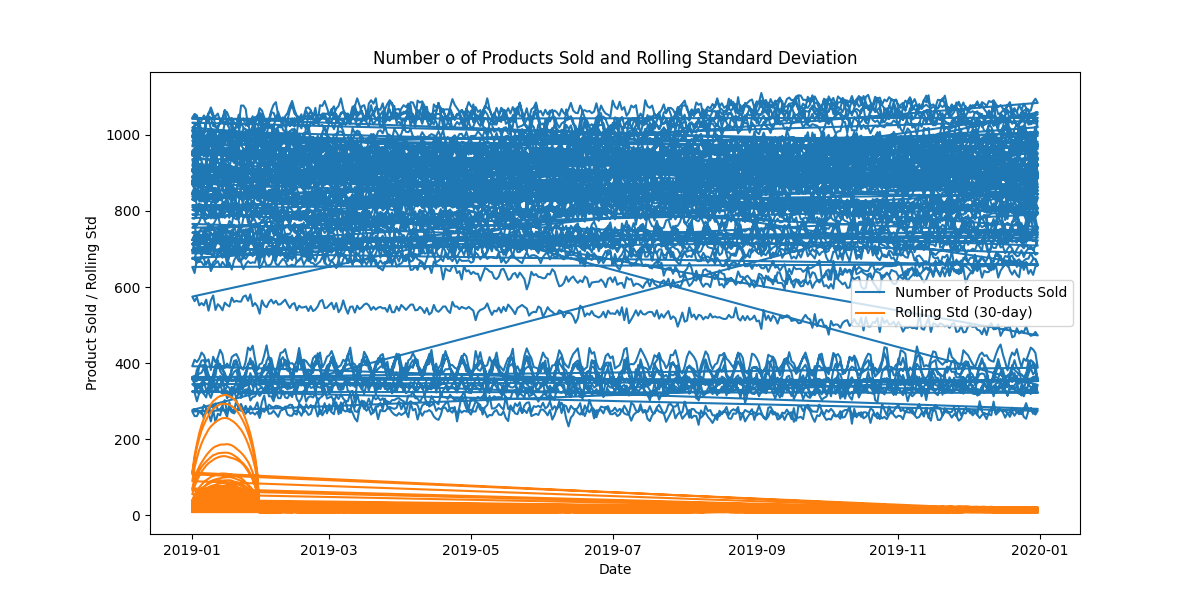

In [18]:
# Example of using rolling standard deviation
window = 30
df["Rolling_Std"] = df["number_sold"].rolling(window=window).std()

plt.figure(figsize=(12, 6))
plt.plot(df["number_sold"], label="Number of Products Sold")
plt.plot(df["Rolling_Std"], label=f"Rolling Std ({window}-day)")
plt.title("Number o of Products Sold and Rolling Standard Deviation")
plt.xlabel("Date")
plt.ylabel("Product Sold / Rolling Std")
plt.legend()
plt.show()

## Step 8: Perform Time-Based Operations

store_id         3.000000
product_id       4.500000
number_sold    789.842857
Rolling_Std     44.809924
Name: 2019-01-05 00:00:00, dtype: float64


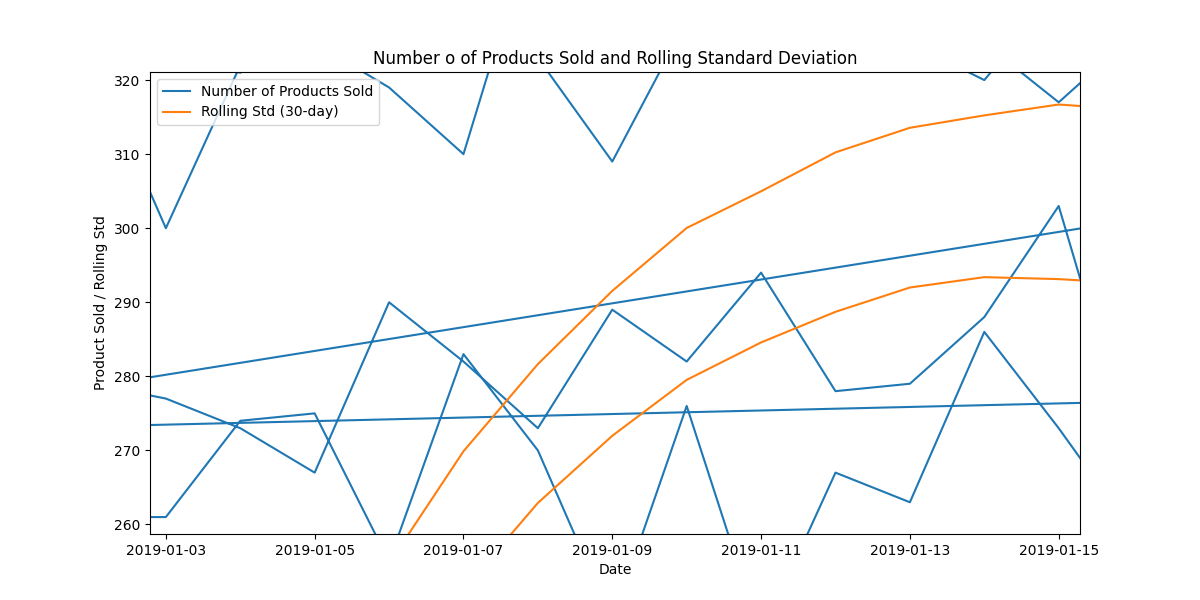

In [29]:
# Example: Resampling data to weekly frequency
weekly_data = df.resample("D").mean()
# Access data by integer location
print(weekly_data.iloc[4])  
plt.plot(weekly_data)
plt.show()


## For a Single Product

In [56]:
df = df.reset_index()

print(df)

            Date  index  store_id  product_id  number_sold  Rolling_Std
0     2019-01-01      0         0           0          845          NaN
1     2019-01-02      1         0           0          851          NaN
2     2019-01-03      2         0           0          840          NaN
3     2019-01-04      3         0           0          842          NaN
4     2019-01-05      4         0           0          845          NaN
...          ...    ...       ...         ...          ...          ...
25545 2019-12-27  25545         6           9          901    15.879177
25546 2019-12-28  25546         6           9          926    15.790620
25547 2019-12-29  25547         6           9          913    15.829588
25548 2019-12-30  25548         6           9          899    15.553985
25549 2019-12-31  25549         6           9          886    15.670604

[25550 rows x 6 columns]


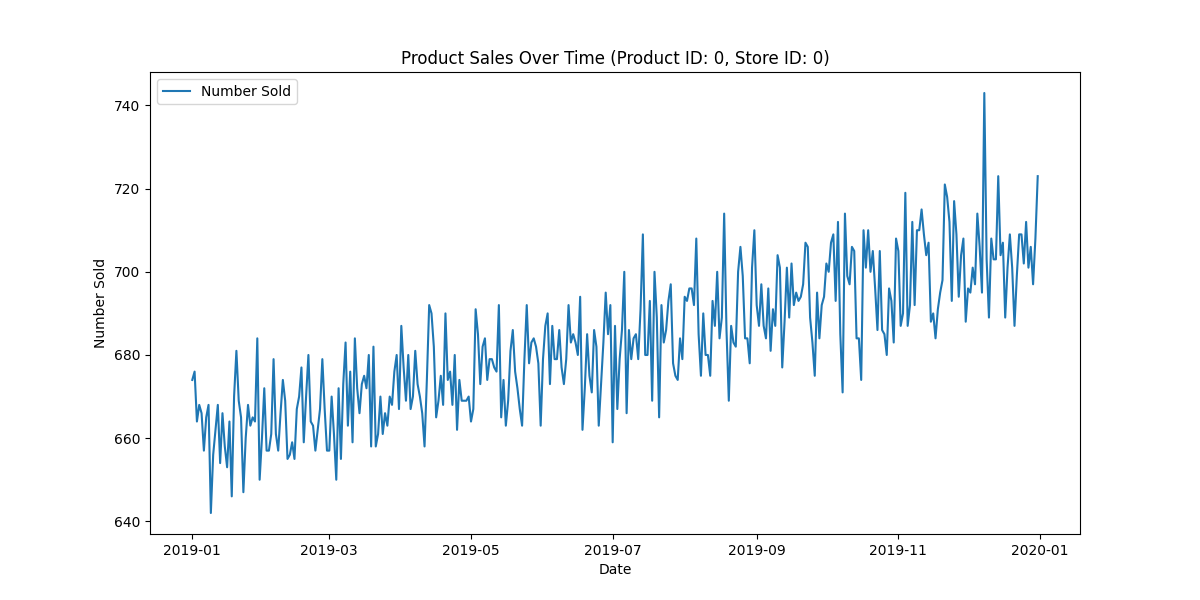

In [61]:

plt.figure(figsize=(12, 6))

# Corrected filtering condition with parentheses
product_df = df[(df["product_id"] == 0) & (df["store_id"] == 1)]

plt.plot(product_df["number_sold"], label="Number Sold")
plt.title("Product Sales Over Time (Product ID: 0, Store ID: 0)")
plt.xlabel("Date")
plt.ylabel("Number Sold")
plt.legend()
plt.show()

In [65]:
import plotly.express as px

fig = px.line(
    df,
    x=df.index,
    y="number_sold",
    color="store_id",
    line_group="product_id",
    labels={"number_sold": "Number Sold"},
    title="Interactive Product Sales Over Time",
    template="plotly_dark",
)

# Show the interactive plot
fig.show()